In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import sklearn as sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


from sklearn.ensemble import RandomForestClassifier
##SVM, Decision Tree, KNN, Naive Bayes
from xgboost import XGBClassifier
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from matplotlib import pyplot

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline


In [2]:
#Load train data
df_train=pd.read_csv('df2.csv')

#Load test data
df_test=pd.read_csv('df1.csv')

In [3]:
#Look at the train data
df_train.shape

(10000, 10)

In [4]:
#First few rows of the train data
df_train.head()

,age,cost,device,gender,Location,income,how_many_drivers,how_many_cars,prior_record,result
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


In [5]:
#Last few rows of the train data
df_train.tail()

,age,cost,device,gender,Location,income,how_many_drivers,how_many_cars,prior_record,result
9995,41,0.004225,desktop,M,0,64489,2,3,8,0
9996,50,0.004751,other,F,0,88643,1,3,0,0
9997,60,0.003804,other,M,0,87870,2,2,9,0
9998,18,0.003838,laptop,M,0,56468,2,2,0,0
9999,33,0.005250,iPhone,NaN,0,59935,2,1,6,0


In [6]:
df_train.dtypes

age                   int64
cost                float64
device               object
gender               object
Location              int64
income                int64
how_many_drivers      int64
how_many_cars         int64
prior_record          int64
result                int64
dtype: object

In [7]:
## Quite unbalanced data
df_train['result'].value_counts()

0    9018
1     982
Name: result, dtype: int64

In [8]:
df_test.head()

,age,cost,device,gender,location,income,how_many_drivers,how_many_car,prior_record
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3


In [9]:
# Something is missing
#df_test['result'].value_counts()

In [10]:
##Checking for missing values
df_train.isna().sum()

age                   0
cost                  0
device                0
gender              269
Location              0
income                0
how_many_drivers      0
how_many_cars         0
prior_record          0
result                0
dtype: int64

In [11]:
df_train["gender"].value_counts()

F    4970
M    4761
Name: gender, dtype: int64

In [12]:
df_train["gender"].fillna("F", inplace = True) 

In [13]:
df_train["gender"].value_counts()

F    5239
M    4761
Name: gender, dtype: int64

In [14]:
# Dropping na rows for simplicity
#df_train.dropna(axis = 0, inplace = True)

In [15]:
len(df_train)

10000

In [16]:
df_train.isna().sum()

age                 0
cost                0
device              0
gender              0
Location            0
income              0
how_many_drivers    0
how_many_cars       0
prior_record        0
result              0
dtype: int64

### Encoding

In [17]:
# Converting categorical inputs to numeric
df_train['gender'] = df_train['gender'].map({'F': 0, 'M':1})

In [18]:

device_dummy = pd.get_dummies(df_train['device'])
device_dummy.head()

,Android,desktop,iPhone,laptop,other
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,1,0,0,0


In [19]:
df_train2 = pd.concat([df_train, device_dummy], axis = 1)
df_train2.head()


,age,cost,device,gender,Location,income,how_many_drivers,how_many_cars,prior_record,result,Android,desktop,iPhone,laptop,other
0,56,0.005737,iPhone,1,0,62717,2,1,4,0,0,0,1,0,0
1,50,0.004733,desktop,0,0,64328,2,3,2,0,0,1,0,0,0
2,54,0.004129,laptop,1,0,83439,1,3,7,0,0,0,0,1,0
3,16,0.005117,Android,0,0,30110,2,3,0,0,1,0,0,0,0
4,37,0.003635,desktop,1,0,76565,2,1,5,0,0,1,0,0,0


In [20]:
df_train2.columns

Index(['age', 'cost', 'device', 'gender', 'Location', 'income',
       'how_many_drivers', 'how_many_cars', 'prior_record', 'result',
       'Android', 'desktop', 'iPhone', 'laptop', 'other'],
      dtype='object')

In [21]:

df_train2.drop(columns = ['device'], inplace = True)

In [22]:
X_train_final = df_train2.drop(columns = ['result'])

y_train_final = df_train2['result']

## Modeling

### Logistic Regression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_train_final, y_train_final, test_size=0.33, random_state = 0)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [27]:
model.score(X_test, y_test)

0.8930303030303031

In [28]:
model.predict_proba(X_test)

array([[0.85115571, 0.14884429],
       [0.93982277, 0.06017723],
       [0.83035306, 0.16964694],
       ...,
       [0.83449615, 0.16550385],
       [0.90214668, 0.09785332],
       [0.78484007, 0.21515993]])

In [29]:
AUC=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print(AUC)

0.5109868296467046


### Random Forest

In [30]:
rf = RandomForestClassifier()

In [31]:
rf.fit(X_train_final, y_train_final)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

In [33]:
rf.score(X_train, y_train)

1.0

In [34]:
rf.score(X_test, y_test)

1.0

In [35]:
print('Accuracy Score for Train Set: {:.4f}'.format(accuracy_score(y_train, rf_pred_train)))
print('Accuracy Score for Test Set: {:.4f}'.format(accuracy_score(y_test, rf_pred_test)))

Accuracy Score for Train Set: 1.0000
Accuracy Score for Test Set: 1.0000


In [36]:
y_test_prob = rf.predict_proba(X_test)[:,1]

AUC = roc_auc_score(y_test, y_test_prob)
AUC

1.0

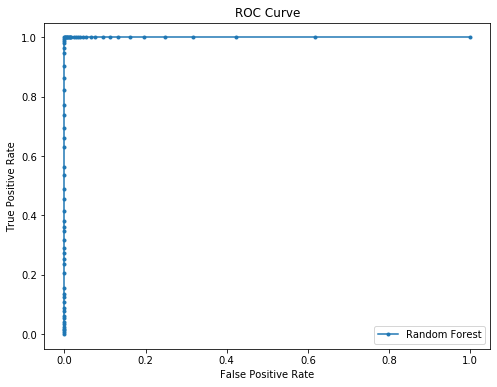

In [37]:

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

plt.figure(figsize = (8, 6))

# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [38]:
## Alternative for AUC calculation
auc(fpr, tpr)

1.0

### Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier()

In [41]:
dt.fit(X_train_final, y_train_final)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)

In [43]:

dt.score(X_train, y_train)

1.0

In [44]:
dt.score(X_test, y_test)

1.0

In [45]:
y_test_prob = dt.predict_proba(X_test)[:,1]

AUC = roc_auc_score(y_test, y_test_prob)
AUC

1.0

In [46]:
confusion_matrix(y_test, dt_pred_test, labels=[1,0])

array([[ 353,    0],
       [   0, 2947]])

### Support Vector Classifier

In [47]:
from sklearn.svm import SVC

In [48]:
svm = SVC(probability = True)

In [49]:
svm.fit(X_train_final, y_train_final)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [50]:
svm_pred_train = svm.predict(X_train)
svm_pred_test = dt.predict(X_test)

In [51]:
svm.score(X_train, y_train)

0.9061194029850747

In [52]:
svm.score(X_test, y_test)

0.8930303030303031

In [53]:
y_test_prob = dt.predict_proba(X_test)[:,1]

AUC = roc_auc_score(y_test, y_test_prob)
AUC

1.0

In [54]:
#RECALL AND PRECISION

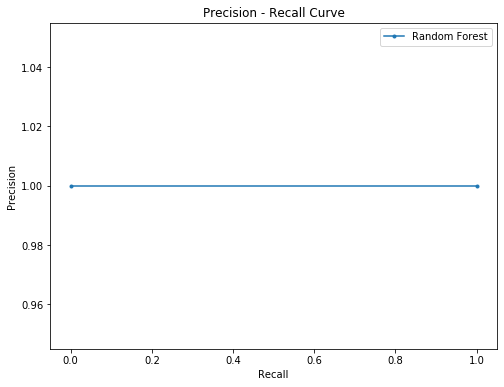

In [55]:
# Since this is an imbalanced data, better to look at recall and precision

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)

plt.figure(figsize = (8, 6))

# plot the roc curve for the model
pyplot.plot(recall, precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision - Recall Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [56]:
y_test.value_counts()

0    2947
1     353
Name: result, dtype: int64

In [57]:
confusion_matrix(y_test, rf_pred_test, labels=[1,0])

array([[ 353,    0],
       [   0, 2947]])

In [58]:
pd.DataFrame(confusion_matrix(y_test, rf_pred_test, labels=[1,0]), columns = ["1", "0"], index = ["1", "0"])

,1,0
1,353,0
0,0,2947


In [59]:
f1_score(y_test, rf_pred_test)

1.0

In [60]:
precision_score(y_test, rf_pred_test)

1.0

In [61]:
recall_score(y_test, rf_pred_test)

1.0